<H3>PRI 2022: first project delivery</H3>

**GROUP 1**
- Robin Helbig, ist1105007
- Karolina Kowalczyk, ist1105122
- name, number

<H3>Part I: demo of facilities</H3>

In [9]:
import time
import sys

from IPython.core.display import HTML

#imports

from mainFunctions.ranking import ranking
from operator import attrgetter
from helper.documentHelper import read_files
from mainFunctions.indexing import indexing
from src.helper.mockDataVisualize import transfer_function_output_ranking
from src.mainFunctions.evaluation import calculate_true_pos, calculate_precision_recall, calculate_fbeta_measure, \
    calculate_precision_recall_tables_and_MAP_param, draw_precision_recall_curve, \
    get_MAP_avg_by_cat_and_standard_deviation, draw_MAP_chart, calculate_statistics
from src.mainFunctions.visualize import visualize
from src.helper.documentHelper import read_files
from matplotlib import pyplot as plt
from collections import Counter
import numpy

**A) Indexing facilities**

*A.1 Preprocessing options: statistics*

In [10]:
#rare, most common terms
text_processing = True
start = time.time()
documents = read_files(text_processing)
end = time.time()
print("load time: ", end - start)

load time:  24.102035999298096


*A.2 Indexing statistics*

In [11]:
#code, statistics and/or charts here
start = time.time()

corpus_index = indexing(list(map(attrgetter('text_terms'), documents)))
corpus_idfs: {str: float} = {}
for v in corpus_index:
    corpus_idfs[v] = corpus_index[v].inverted_document_frequency

end = time.time()
print("corpus index time: ", end - start)
print("corpus index size: ", sys.getsizeof(corpus_index))
print("corpus idfs size: ", sys.getsizeof(corpus_idfs))


corpus index time:  2.932609796524048
corpus index size:  20971608
corpus idfs size:  20971608


**B) Ranking facilities**

In [12]:
order_ranked = True
max_sent = 8
max_chars = 1010

document = documents[32]

summary_tf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})
summary_tfidf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})
summary_bm25 = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})
summary_rrf = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "rrf", "mmr": False})
summary_mmr = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True})

*B.1 Summarization solution: results for a given document*

TF Ranking
Precision:  0.5
Recall:  0.2857142857142857
F-beta:  0.4347826086956521
MAP:  0.4303571428571428


/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:159: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i],
/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:161: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i], r[i + 1]), (p[i + 1], p[i + 1]), 'k-', label='', color='red')
/Users/robinhelbig/Dev/Semester 3/RGI/Project/src/mainFunctions/evaluation.py:163: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(r, dup_p, 'k--', color='blue')
/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes t

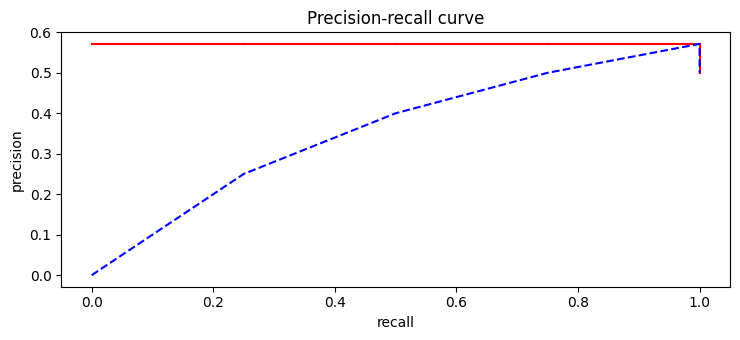

In [13]:
document.summary = summary_tf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
recall_table, precision_table, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)
precision_recall_tuple = (recall_table, precision_table)

print("TF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)
draw_precision_recall_curve(precision_recall_tuple)

*B.2 Classic IR models: differences*

In [14]:
document.summary = summary_tfidf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("TF-IDF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

document.summary = summary_bm25

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("\n")
print("BM25 Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

TF-IDF Ranking
Precision:  0.375
Recall:  0.21428571428571427
F-beta:  0.3260869565217391
MAP:  0.33730158730158727


BM25 Ranking
Precision:  0.625
Recall:  0.35714285714285715
F-beta:  0.5434782608695652
MAP:  0.7961904761904762


*B.3 Reciprocal rank funsion*

In [15]:
document.summary = summary_rrf

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("RRF Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

RRF Ranking
Precision:  0.5
Recall:  0.2857142857142857
F-beta:  0.4347826086956521
MAP:  0.4125


*B.4 Maximal Marginal Relevance*

In [16]:
document.summary = summary_mmr

TP = calculate_true_pos(document)
precision, recall = calculate_precision_recall(document.referenceSummary, document.summary, TP)
fbeta = calculate_fbeta_measure(precision, recall)
_, _, MAP = calculate_precision_recall_tables_and_MAP_param(document.summary, TP)

print("MMR Ranking")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-beta: ", fbeta)
print("MAP: ", MAP)

MMR Ranking
Precision:  0.375
Recall:  0.21428571428571427
F-beta:  0.3260869565217391
MAP:  0.33730158730158727


**C) Sentence higlighting facilities**

In [17]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary1"
visualize(doc_path, dict, 1)
HTML(filename=doc_path + ".html")

In [18]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary2"
visualize(doc_path, dict, 2)
HTML(filename=doc_path + ".html")

In [19]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary3"
visualize(doc_path, dict, 3)
HTML(filename=doc_path + ".html")

In [20]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary4"
visualize(doc_path, dict, 4)
HTML(filename=doc_path + ".html")

In [21]:
dict = transfer_function_output_ranking(document.text_sentences, summary_bm25)
doc_path = "summaries/summary5"
visualize(doc_path, dict, 5)
HTML(filename=doc_path + ".html")

**D) Evaluation facilities**

*D.1 Evaluation options*

(0.6631962673958478, 0.18499593409105664) (0.6541198612432876, 0.19384784988493758) (0.6033610662490412, 0.21432516174630337) (0.629691769728113, 0.21531416410198223) (0.6490178748140983, 0.2058385136749442)


/Users/robinhelbig/Dev/PythonInterpreter/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


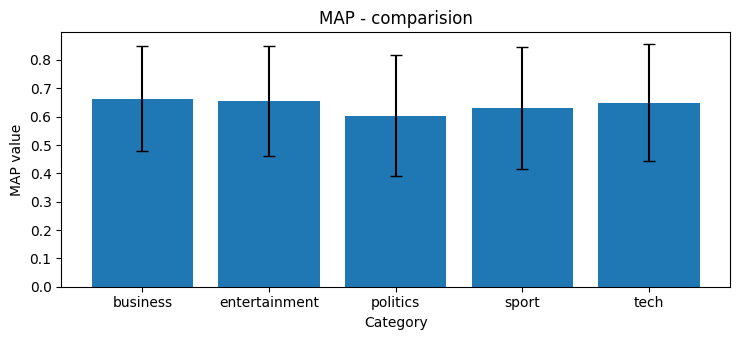

In [22]:
for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})

business_docs = list(filter(lambda d: d.category == "business", documents))
business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)
entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)
politics_docs = list(filter(lambda d: d.category == "politics", documents))
politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)
sport_docs = list(filter(lambda d: d.category == "sport", documents))
sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)
tech_docs = list(filter(lambda d: d.category == "tech", documents))
tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)

print(business, entertainment, politics, sport, tech)
draw_MAP_chart(business, entertainment, politics, sport, tech)

*D.2 Comparison of settings (IR models, preprocessing)*

In [23]:
#code, statistics and/or charts here
for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### TF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### TF-IDF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### BM25 ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "rrf", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### RRF ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

for document in documents:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents)
print("### MMR ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

### TF ###
Average Precision:  0.489852862493312
Average Recall:  0.5865056878164239
Average F-Beta:  0.4936685051021447
Average MAP:  0.6401575683456918
##########
### TF-IDF ###
Average Precision:  0.4867067950775817
Average Recall:  0.5858110746355357
Average F-Beta:  0.4912979016457239
Average MAP:  0.633157494458459
##########
### BM25 ###
Average Precision:  0.574852862493312
Average Recall:  0.668924528591727
Average F-Beta:  0.5762088329662882
Average MAP:  0.7668698208871588
##########
### RRF ###
Average Precision:  0.5228865703584805
Average Recall:  0.6194304651253445
Average F-Beta:  0.5259825397681428
Average MAP:  0.6889688679966396
##########
### MMR ###
Average Precision:  0.3469315141787053
Average Recall:  0.435239731199037
Average F-Beta:  0.35259053695182563
Average MAP:  0.5778323473209521
##########


<H3>Part II: questions materials (optional)</H3>

**(a)** Corpus and summary description. Distribution of informative terms before and after text processing.

In [24]:
# documents_without_preprocessing = read_files(False)
# documents_with_preprocessing = read_files(True)
#
# without_array = []
# with_array = []
# enum1 = []
# enum_number = 0
#
# for d in documents_without_preprocessing:
#     enum_number += 1
#     terms_without_preprocessing = d.text_terms
#     # ["Cats" "are" black or white and eat mickey mouse]
#     without_array.append(len(terms_without_preprocessing))
#     enum1.append(enum_number)
#
# enum_number = 0
# for d in documents_with_preprocessing:
#     terms_with_preprocessing = d.text_terms
#     # ["Cats", black, white, mickey, mouse, Cats black, black white, white mickey, mickey mouse]
#     with_array.append(len(terms_with_preprocessing))
#
# with_array_mod = []
# without_array_mod = []
# for value in with_array:
#     with_array_mod.append(int(value/100))
# for value in without_array:
#     without_array_mod.append(int(value / 100))
#
# c1_counted = Counter(with_array_mod)
# c2_counted = Counter(without_array_mod)
#
#
#
# plt.bar(c1_counted.keys(), c1_counted.values(), label = "with processing")
# plt.bar(c2_counted.keys(), c2_counted.values(), label = "without processing")
# plt.xlabel('words * 10^2')
# plt.ylabel('number of documents')
# plt.legend()
# plt.show()

**(b)** Summarization performance for the overall and category-conditional corpora.

In [25]:
# from operator import attrgetter
#
# from src.mainFunctions.indexing import indexing
# from src.helper.documentHelper import read_files
# from src.mainFunctions.ranking import ranking
#
# from src.mainFunctions.evaluation import calculate_true_pos
# from src.mainFunctions.evaluation import get_MAP_avg_by_cat_and_standard_deviation
# from src.mainFunctions.evaluation import draw_MAP_chart
# from src.mainFunctions.evaluation import calculate_precision_recall_tables_and_MAP_param
# from src.mainFunctions.evaluation import draw_precision_recall_curve
# from src.mainFunctions.evaluation import calculate_precision_recall
# from src.mainFunctions.evaluation import calculate_fbeta_measure
#
# from src.helper.helper import write_to_csv
#
# order_ranked = True
# text_processing = True
# documents = read_files(text_processing)
# index = indexing(list(map(attrgetter('text_terms'), documents)))
# corpus_idfs: {str: float} = {}
# for v in index:
#     corpus_idfs[v] = index[v].inverted_document_frequency
# fbeta_list_tf = []
# # MAP_avg_by_cat_and_standard_deviation, interpolated recall-and-precision curve for doc 2 - tf
# for document in documents:
#     document.summary = ranking(document, 8, 1010, order_ranked, corpus_idfs, {"rank_option": "tf", "mmr": False})
#     true_pos = calculate_true_pos(document)
#     precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
#     fbeta_list_tf.append(calculate_fbeta_measure(precision_recall_tuple[0], precision_recall_tuple[1]))
#     precision_recall_tuple_table = calculate_precision_recall_tables_and_MAP_param(document.summary,
#                                                                              true_pos)
#     if document.id == 2:
#         draw_precision_recall_curve(precision_recall_tuple_table)
#
# avg_fbeta_tf = sum(fbeta_list_tf) / len(fbeta_list_tf)
# print(avg_fbeta_tf)
#
# business_docs = list(filter(lambda d: d.category == "business", documents))
# business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)
#
# entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
# entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)
#
# politics_docs = list(filter(lambda d: d.category == "politics", documents))
# politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)
#
# sport_docs = list(filter(lambda d: d.category == "sport", documents))
# sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)
#
# tech_docs = list(filter(lambda d: d.category == "tech", documents))
# tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)
#
# draw_MAP_chart(business, entertainment, politics, sport, tech)
#
# fbeta_list_tf_idf = []
# # MAP_avg_by_cat_and_standard_deviation, interpolated recall-and-precision curve for doc 2 - tf-idf
# for document in documents:
#     document.summary = ranking(document, 8, 1010, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": False})
#     true_pos = calculate_true_pos(document)
#     precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
#     fbeta_list_tf_idf.append(calculate_fbeta_measure(precision_recall_tuple[0], precision_recall_tuple[1]))
#     precision_recall_tuple_table = calculate_precision_recall_tables_and_MAP_param(document.summary,
#                                                                                    true_pos)
#     if document.id == 2:
#         draw_precision_recall_curve(precision_recall_tuple_table)
#
# avg_fbeta_tf_idf = sum(fbeta_list_tf_idf) / len(fbeta_list_tf_idf)
# print(avg_fbeta_tf_idf)
#
# business_docs = list(filter(lambda d: d.category == "business", documents))
# business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)
#
# entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
# entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)
#
# politics_docs = list(filter(lambda d: d.category == "politics", documents))
# politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)
#
# sport_docs = list(filter(lambda d: d.category == "sport", documents))
# sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)
#
# tech_docs = list(filter(lambda d: d.category == "tech", documents))
# tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)
#
# draw_MAP_chart(business, entertainment, politics, sport, tech)
#
# fbeta_list_bm25 = []
# # MAP_avg_by_cat_and_standard_deviation, interpolated recall-and-precision curve for doc 2 - bm25
# for document in documents:
#     document.summary = ranking(document, 8, 1010, order_ranked, corpus_idfs, {"rank_option": "bm25", "mmr": False})
#     true_pos = calculate_true_pos(document)
#     precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
#     fbeta_list_bm25.append(calculate_fbeta_measure(precision_recall_tuple[0], precision_recall_tuple[1]))
#     precision_recall_tuple_table = calculate_precision_recall_tables_and_MAP_param(document.summary,
#                                                                                    true_pos)
#     if document.id == 2:
#         draw_precision_recall_curve(precision_recall_tuple_table)
#
# avg_fbeta_bm25 = sum(fbeta_list_bm25) / len(fbeta_list_bm25)
# print(avg_fbeta_bm25)
#
# business_docs = list(filter(lambda d: d.category == "business", documents))
# business = get_MAP_avg_by_cat_and_standard_deviation(business_docs)
#
# entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
# entertainment = get_MAP_avg_by_cat_and_standard_deviation(entertainment_docs)
#
# politics_docs = list(filter(lambda d: d.category == "politics", documents))
# politics = get_MAP_avg_by_cat_and_standard_deviation(politics_docs)
#
# sport_docs = list(filter(lambda d: d.category == "sport", documents))
# sport = get_MAP_avg_by_cat_and_standard_deviation(sport_docs)
#
# tech_docs = list(filter(lambda d: d.category == "tech", documents))
# tech = get_MAP_avg_by_cat_and_standard_deviation(tech_docs)
#
# draw_MAP_chart(business, entertainment, politics, sport, tech)
#
# fbeta_header = ['all_docs_tf', 'all_docs_tf_idf', 'all_docs_bm25']
# fbeta_data = [avg_fbeta_tf, avg_fbeta_tf_idf, avg_fbeta_bm25]
# write_to_csv('fbeta.csv', fbeta_header, [fbeta_data])

**(c)** Impact of Lambda on MMR

In [26]:
# from src.mainFunctions.evaluation import calculate_accuracy, calculate_redundancy
# import pandas
#
# data = []
# headers=["lambda", "accuracy", "redundancy"]
#
# accuracy_avg = 0.0
# redundancy_avg = 0.0
# document_count = len(documents)
#
# for document in documents:
#     document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True, "lam": 0.01})
#     accuracy_avg += calculate_accuracy(document)
#     redundancy_avg += calculate_redundancy(document.summary, text_processing)
#
# accuracy_avg = accuracy_avg / document_count
# redundancy_avg = redundancy_avg / document_count
#
# data.append([0.01, accuracy_avg, redundancy_avg])
#
# accuracy_avg = 0.0
# redundancy_avg = 0.0
# document_count = len(documents)
#
# for document in documents:
#     document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True, "lam": 0.5})
#     accuracy_avg += calculate_accuracy(document)
#     redundancy_avg += calculate_redundancy(document.summary, text_processing)
#
# accuracy_avg = accuracy_avg / document_count
# redundancy_avg = redundancy_avg / document_count
#
# data.append([0.5, accuracy_avg, redundancy_avg])
#
#
#
# accuracy_avg = 0.0
# redundancy_avg = 0.0
# document_count = len(documents)
#
# for document in documents:
#     document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs, {"rank_option": "tf-idf", "mmr": True, "lam": 0.99})
#     accuracy_avg += calculate_accuracy(document)
#     redundancy_avg += calculate_redundancy(document.summary, text_processing)
#
# accuracy_avg = accuracy_avg / document_count
# redundancy_avg = redundancy_avg / document_count
#
# data.append([0.99, accuracy_avg, redundancy_avg])
#
# print(pandas.DataFrame(data, None, headers))

<h5> General </h5>
<pre>
     lambda  accuracy  redundancy
0    0.01  0.562047    3.373847
1    0.50  0.452772    3.296634
2    0.99  0.362888    3.218444
</pre>

<h5> Business </h5>
<pre>
     lambda  accuracy  redundancy
0    0.01  0.553130    3.395823
1    0.50  0.425835    3.318441
2    0.99  0.334509    3.256647
</pre>

<h5> Politics </h5>
<pre>
     lambda  accuracy  redundancy
0    0.01  0.556492    3.404166
1    0.50  0.463163    3.322589
2    0.99  0.386060    3.226669
</pre>


<h5> Entertainment </h5>
<pre>
     lambda  accuracy  redundancy
0    0.01  0.535047    3.385929
1    0.50  0.430906    3.315085
2    0.99  0.343709    3.235589
</pre>

<h5> Sport </h5>
<pre>
     lambda  accuracy  redundancy
0    0.01  0.556325    3.305894
1    0.50  0.479434    3.254696
2    0.99  0.385884    3.177505
</pre>

<h5> Tech </h5>
<pre>
     lambda  accuracy  redundancy
0    0.01  0.581861    3.387714
1    0.50  0.470324    3.298496
2    0.99  0.378990    3.201768
</pre>

**(d)** Impact of p and l on precision and recall

In [27]:
# #question 4
# from operator import attrgetter
#
# from src.mainFunctions.indexing import indexing
# from src.helper.documentHelper import read_files
# from src.mainFunctions.ranking import ranking
#
# from src.mainFunctions.evaluation import calculate_true_pos
# from src.mainFunctions.evaluation import get_MAP_avg_by_cat_and_standard_deviation
# from src.mainFunctions.evaluation import draw_MAP_chart
# from src.mainFunctions.evaluation import calculate_precision_recall_tables_and_MAP_param
# from src.mainFunctions.evaluation import draw_precision_recall_curve
# from src.mainFunctions.evaluation import calculate_precision_recall
# from src.mainFunctions.evaluation import calculate_fbeta_measure
#
# from src.helper.helper import write_to_csv
#
# def calculate_avg_precision_recall_for_category(category_docs, p, l):
#     precision_table = []
#     recall_table = []
#     for document in category_docs:
#         document.summary = ranking(document, p, l, order_ranked, corpus_idfs,
#                                    {"rank_option": "tf-idf", "mmr": False})
#         true_pos = calculate_true_pos(document)
#         precision_recall_tuple = calculate_precision_recall(document.referenceSummary, document.summary, true_pos)
#         precision_table.append(precision_recall_tuple[0])
#         recall_table.append(precision_recall_tuple[1])
#
#     precision_avg = sum(precision_table) / len(recall_table)
#     recall_avg = sum(recall_table) / len(recall_table)
#     return precision_avg, recall_avg
#
#
# order_ranked = True
# text_processing = True
# documents = read_files(text_processing)
# index = indexing(list(map(attrgetter('text_terms'), documents)))
# corpus_idfs: {str: float} = {}
# for v in index:
#     corpus_idfs[v] = index[v].inverted_document_frequency
#
# row1 = [6, 800]
# row2 = [6, 1010]
# row3 = [6, 1200]
# row4 = [8, 800]
# row5 = [8, 1010]
# row6 = [8, 1200]
# row7 = [10, 800]
# row8 = [10, 1010]
# row9 = [10, 1200]
#
#
# all_documents_6_800 = calculate_avg_precision_recall_for_category(documents, 6, 800)
# precision_avg_6_800 = all_documents_6_800[0]
# recall_avg_6_800 = all_documents_6_800[1]
# row1.append(precision_avg_6_800)
# row1.append(recall_avg_6_800)
#
# all_documents_6_1010 = calculate_avg_precision_recall_for_category(documents, 6, 1010)
# precision_avg_6_1010 = all_documents_6_1010[0]
# recall_avg_6_1010 = all_documents_6_1010[1]
# row2.append(precision_avg_6_1010)
# row2.append(recall_avg_6_1010)
#
# all_documents_6_1200 = calculate_avg_precision_recall_for_category(documents, 6, 1200)
# precision_avg_6_1200 = all_documents_6_1200[0]
# recall_avg_6_1200 = all_documents_6_1200[1]
# row3.append(precision_avg_6_1200)
# row3.append(recall_avg_6_1200)
#
# all_documents_8_800 = calculate_avg_precision_recall_for_category(documents, 8, 800)
# precision_avg_8_800 = all_documents_8_800[0]
# recall_avg_8_800 = all_documents_8_800[1]
# row4.append(precision_avg_8_800)
# row4.append(recall_avg_8_800)
#
# all_documents_8_1010 = calculate_avg_precision_recall_for_category(documents, 8, 1010)
# precision_avg_8_1010 = all_documents_8_1010[0]
# recall_avg_8_1010 = all_documents_8_1010[1]
# row5.append(precision_avg_8_1010)
# row5.append(recall_avg_8_1010)
#
# all_documents_8_1200 = calculate_avg_precision_recall_for_category(documents, 8, 1200)
# precision_avg_8_1200 = all_documents_8_1200[0]
# recall_avg_8_1200 = all_documents_8_1200[1]
# row6.append(precision_avg_8_1200)
# row6.append(recall_avg_8_1200)
#
# all_documents_10_800 = calculate_avg_precision_recall_for_category(documents, 10, 800)
# precision_avg_10_800 = all_documents_10_800[0]
# recall_avg_10_800 = all_documents_10_800[1]
# row7.append(precision_avg_10_800)
# row7.append(recall_avg_10_800)
#
# all_documents_10_1010 = calculate_avg_precision_recall_for_category(documents, 10, 1010)
# precision_avg_10_1010 = all_documents_10_1010[0]
# recall_avg_10_1010 = all_documents_10_1010[1]
# row8.append(precision_avg_10_1010)
# row8.append(recall_avg_10_1010)
#
# all_documents_10_1200 = calculate_avg_precision_recall_for_category(documents, 10, 1200)
# precision_avg_10_1200 = all_documents_10_1200[0]
# recall_avg_10_1200 = all_documents_10_1200[1]
# row9.append(precision_avg_10_1200)
# row9.append(recall_avg_10_1200)
#
# business_docs = list(filter(lambda d: d.category == "business", documents))
#
# business_6_800 = calculate_avg_precision_recall_for_category(business_docs, 6, 800)
# business_precision_avg_6_800 = business_6_800[0]
# business_recall_avg_6_800 = business_6_800[1]
# row1.append(business_precision_avg_6_800)
# row1.append(business_precision_avg_6_800)
#
# business_6_1010 = calculate_avg_precision_recall_for_category(business_docs, 6, 1010)
# business_precision_avg_6_1010 = business_6_1010[0]
# business_recall_avg_6_1010 = business_6_1010[1]
# row2.append(business_precision_avg_6_1010)
# row2.append(business_recall_avg_6_1010)
#
# business_6_1200 = calculate_avg_precision_recall_for_category(business_docs, 6, 1200)
# business_precision_avg_6_1200 = business_6_1200[0]
# business_recall_avg_6_1200 = business_6_1200[1]
# row3.append(business_precision_avg_6_1200)
# row3.append(business_recall_avg_6_1200)
#
# business_8_800 = calculate_avg_precision_recall_for_category(business_docs, 8, 800)
# business_precision_avg_8_800 = business_8_800[0]
# business_recall_avg_8_800 = business_8_800[1]
# row4.append(business_precision_avg_8_800)
# row4.append(business_recall_avg_8_800)
#
# business_8_1010 = calculate_avg_precision_recall_for_category(business_docs, 8, 1010)
# business_precision_avg_8_1010 = business_8_1010[0]
# business_recall_avg_8_1010 = business_8_1010[1]
# row5.append(business_precision_avg_8_1010)
# row5.append(business_recall_avg_8_1010)
#
# business_8_1200 = calculate_avg_precision_recall_for_category(business_docs, 8, 1200)
# business_precision_avg_8_1200 = business_8_1200[0]
# business_recall_avg_8_1200 = business_8_1200[1]
# row6.append(business_precision_avg_8_1200)
# row6.append(business_recall_avg_8_1200)
#
# business_10_800 = calculate_avg_precision_recall_for_category(business_docs, 10, 800)
# business_precision_avg_10_800 = business_10_800[0]
# business_recall_avg_10_800 = business_10_800[1]
# row7.append(business_precision_avg_10_800)
# row7.append(business_recall_avg_10_800)
#
# business_10_1010 = calculate_avg_precision_recall_for_category(business_docs, 10, 1010)
# business_precision_avg_10_1010 = business_10_1010[0]
# business_recall_avg_10_1010 = business_10_1010[1]
# row8.append(business_precision_avg_10_1010)
# row8.append(business_recall_avg_10_1010)
#
# business_10_1200 = calculate_avg_precision_recall_for_category(business_docs, 10, 1200)
# business_precision_avg_10_1200 = business_10_1200[0]
# business_recall_avg_10_1200 = business_10_1200[1]
# row9.append(business_precision_avg_10_1200)
# row9.append(business_recall_avg_10_1200)
#
# entertainment_docs = list(filter(lambda d: d.category == "entertainment", documents))
#
# entertainment_6_800 = calculate_avg_precision_recall_for_category(entertainment_docs, 6, 800)
# entertainment_precision_avg_6_800 = entertainment_6_800[0]
# entertainment_recall_avg_6_800 = entertainment_6_800[1]
# row1.append(entertainment_precision_avg_6_800)
# row1.append(entertainment_precision_avg_6_800)
#
# entertainment_6_1010 = calculate_avg_precision_recall_for_category(entertainment_docs, 6, 1010)
# entertainment_precision_avg_6_1010 = entertainment_6_1010[0]
# entertainment_recall_avg_6_1010 = entertainment_6_1010[1]
# row2.append(entertainment_precision_avg_6_1010)
# row2.append(entertainment_recall_avg_6_1010)
#
# entertainment_6_1200 = calculate_avg_precision_recall_for_category(entertainment_docs, 6, 1200)
# entertainment_precision_avg_6_1200 = entertainment_6_1200[0]
# entertainment_recall_avg_6_1200 = entertainment_6_1200[1]
# row3.append(entertainment_precision_avg_6_1200)
# row3.append(entertainment_recall_avg_6_1200)
#
# entertainment_8_800 = calculate_avg_precision_recall_for_category(entertainment_docs, 8, 800)
# entertainment_precision_avg_8_800 = entertainment_8_800[0]
# entertainment_recall_avg_8_800 = entertainment_8_800[1]
# row4.append(entertainment_precision_avg_8_800)
# row4.append(entertainment_recall_avg_8_800)
#
# entertainment_8_1010 = calculate_avg_precision_recall_for_category(entertainment_docs, 8, 1010)
# entertainment_precision_avg_8_1010 = entertainment_8_1010[0]
# entertainment_recall_avg_8_1010 = entertainment_8_1010[1]
# row5.append(entertainment_precision_avg_8_1010)
# row5.append(entertainment_recall_avg_8_1010)
#
# entertainment_8_1200 = calculate_avg_precision_recall_for_category(entertainment_docs, 8, 1200)
# entertainment_precision_avg_8_1200 = entertainment_8_1200[0]
# entertainment_recall_avg_8_1200 = entertainment_8_1200[1]
# row6.append(entertainment_precision_avg_8_1200)
# row6.append(entertainment_recall_avg_8_1200)
#
# entertainment_10_800 = calculate_avg_precision_recall_for_category(entertainment_docs, 10, 800)
# entertainment_precision_avg_10_800 = entertainment_10_800[0]
# entertainment_recall_avg_10_800 = entertainment_10_800[1]
# row7.append(entertainment_precision_avg_10_800)
# row7.append(entertainment_recall_avg_10_800)
#
# entertainment_10_1010 = calculate_avg_precision_recall_for_category(entertainment_docs, 10, 1010)
# entertainment_precision_avg_10_1010 = entertainment_10_1010[0]
# entertainment_recall_avg_10_1010 = entertainment_10_1010[1]
# row8.append(entertainment_precision_avg_10_1010)
# row8.append(entertainment_recall_avg_10_1010)
#
# entertainment_10_1200 = calculate_avg_precision_recall_for_category(entertainment_docs, 10, 1200)
# entertainment_precision_avg_10_1200 = entertainment_10_1200[0]
# entertainment_recall_avg_10_1200 = entertainment_10_1200[1]
# row9.append(entertainment_precision_avg_10_1200)
# row9.append(entertainment_recall_avg_10_1200)
#
# politics_docs = list(filter(lambda d: d.category == "politics", documents))
# politics_6_800 = calculate_avg_precision_recall_for_category(politics_docs, 6, 800)
# politics_precision_avg_6_800 = politics_6_800[0]
# politics_recall_avg_6_800 = politics_6_800[1]
# row1.append(politics_precision_avg_6_800)
# row1.append(politics_precision_avg_6_800)
#
# politics_6_1010 = calculate_avg_precision_recall_for_category(politics_docs, 6, 1010)
# politics_precision_avg_6_1010 = politics_6_1010[0]
# politics_recall_avg_6_1010 = politics_6_1010[1]
# row2.append(politics_precision_avg_6_1010)
# row2.append(politics_recall_avg_6_1010)
#
# politics_6_1200 = calculate_avg_precision_recall_for_category(politics_docs, 6, 1200)
# politics_precision_avg_6_1200 = politics_6_1200[0]
# politics_recall_avg_6_1200 = politics_6_1200[1]
# row3.append(politics_precision_avg_6_1200)
# row3.append(politics_recall_avg_6_1200)
#
# politics_8_800 = calculate_avg_precision_recall_for_category(politics_docs, 8, 800)
# politics_precision_avg_8_800 = politics_8_800[0]
# politics_recall_avg_8_800 = politics_8_800[1]
# row4.append(politics_precision_avg_8_800)
# row4.append(politics_recall_avg_8_800)
#
# politics_8_1010 = calculate_avg_precision_recall_for_category(politics_docs, 8, 1010)
# politics_precision_avg_8_1010 = politics_8_1010[0]
# politics_recall_avg_8_1010 = politics_8_1010[1]
# row5.append(politics_precision_avg_8_1010)
# row5.append(politics_recall_avg_8_1010)
#
# politics_8_1200 = calculate_avg_precision_recall_for_category(politics_docs, 8, 1200)
# politics_precision_avg_8_1200 = politics_8_1200[0]
# politics_recall_avg_8_1200 = politics_8_1200[1]
# row6.append(politics_precision_avg_8_1200)
# row6.append(politics_recall_avg_8_1200)
#
# politics_10_800 = calculate_avg_precision_recall_for_category(politics_docs, 10, 800)
# politics_precision_avg_10_800 = politics_10_800[0]
# politics_recall_avg_10_800 = politics_10_800[1]
# row7.append(politics_precision_avg_10_800)
# row7.append(politics_recall_avg_10_800)
#
# politics_10_1010 = calculate_avg_precision_recall_for_category(politics_docs, 10, 1010)
# politics_precision_avg_10_1010 = politics_10_1010[0]
# politics_recall_avg_10_1010 = politics_10_1010[1]
# row8.append(politics_precision_avg_10_1010)
# row8.append(politics_recall_avg_10_1010)
#
# politics_10_1200 = calculate_avg_precision_recall_for_category(politics_docs, 10, 1200)
# politics_precision_avg_10_1200 = politics_10_1200[0]
# politics_recall_avg_10_1200 = politics_10_1200[1]
# row9.append(politics_precision_avg_10_1200)
# row9.append(politics_recall_avg_10_1200)
#
# sport_docs = list(filter(lambda d: d.category == "sport", documents))
# sport_6_800 = calculate_avg_precision_recall_for_category(sport_docs, 6, 800)
# sport_precision_avg_6_800 = sport_6_800[0]
# sport_recall_avg_6_800 = sport_6_800[1]
# row1.append(sport_precision_avg_6_800)
# row1.append(sport_precision_avg_6_800)
#
# sport_6_1010 = calculate_avg_precision_recall_for_category(sport_docs, 6, 1010)
# sport_precision_avg_6_1010 = sport_6_1010[0]
# sport_recall_avg_6_1010 = sport_6_1010[1]
# row2.append(sport_precision_avg_6_1010)
# row2.append(sport_recall_avg_6_1010)
#
# sport_6_1200 = calculate_avg_precision_recall_for_category(sport_docs, 6, 1200)
# sport_precision_avg_6_1200 = sport_6_1200[0]
# sport_recall_avg_6_1200 = sport_6_1200[1]
# row3.append(sport_precision_avg_6_1200)
# row3.append(sport_recall_avg_6_1200)
#
# sport_8_800 = calculate_avg_precision_recall_for_category(sport_docs, 8, 800)
# sport_precision_avg_8_800 = sport_8_800[0]
# sport_recall_avg_8_800 = sport_8_800[1]
# row4.append(sport_precision_avg_8_800)
# row4.append(sport_recall_avg_8_800)
#
# sport_8_1010 = calculate_avg_precision_recall_for_category(sport_docs, 8, 1010)
# sport_precision_avg_8_1010 = sport_8_1010[0]
# sport_recall_avg_8_1010 = sport_8_1010[1]
# row5.append(sport_precision_avg_8_1010)
# row5.append(sport_recall_avg_8_1010)
#
# sport_8_1200 = calculate_avg_precision_recall_for_category(sport_docs, 8, 1200)
# sport_precision_avg_8_1200 = sport_8_1200[0]
# sport_recall_avg_8_1200 = sport_8_1200[1]
# row6.append(sport_precision_avg_8_1200)
# row6.append(sport_recall_avg_8_1200)
#
# sport_10_800 = calculate_avg_precision_recall_for_category(sport_docs, 10, 800)
# sport_precision_avg_10_800 = sport_10_800[0]
# sport_recall_avg_10_800 = sport_10_800[1]
# row7.append(sport_precision_avg_10_800)
# row7.append(sport_recall_avg_10_800)
#
# sport_10_1010 = calculate_avg_precision_recall_for_category(sport_docs, 10, 1010)
# sport_precision_avg_10_1010 = sport_10_1010[0]
# sport_recall_avg_10_1010 = sport_10_1010[1]
# row8.append(sport_precision_avg_10_1010)
# row8.append(sport_recall_avg_10_1010)
#
# sport_10_1200 = calculate_avg_precision_recall_for_category(sport_docs, 10, 1200)
# sport_precision_avg_10_1200 = sport_10_1200[0]
# sport_recall_avg_10_1200 = sport_10_1200[1]
# row9.append(sport_precision_avg_10_1200)
# row9.append(sport_recall_avg_10_1200)
#
#
# tech_docs = list(filter(lambda d: d.category == "tech", documents))
# tech_6_800 = calculate_avg_precision_recall_for_category(tech_docs, 6, 800)
# tech_precision_avg_6_800 = tech_6_800[0]
# tech_recall_avg_6_800 = tech_6_800[1]
# row1.append(tech_precision_avg_6_800)
# row1.append(tech_precision_avg_6_800)
#
# tech_6_1010 = calculate_avg_precision_recall_for_category(tech_docs, 6, 1010)
# tech_precision_avg_6_1010 = tech_6_1010[0]
# tech_recall_avg_6_1010 = tech_6_1010[1]
# row2.append(tech_precision_avg_6_1010)
# row2.append(tech_recall_avg_6_1010)
#
# tech_6_1200 = calculate_avg_precision_recall_for_category(tech_docs, 6, 1200)
# tech_precision_avg_6_1200 = tech_6_1200[0]
# tech_recall_avg_6_1200 = tech_6_1200[1]
# row3.append(tech_precision_avg_6_1200)
# row3.append(tech_recall_avg_6_1200)
#
# tech_8_800 = calculate_avg_precision_recall_for_category(tech_docs, 8, 800)
# tech_precision_avg_8_800 = tech_8_800[0]
# tech_recall_avg_8_800 = tech_8_800[1]
# row4.append(tech_precision_avg_8_800)
# row4.append(tech_recall_avg_8_800)
#
# tech_8_1010 = calculate_avg_precision_recall_for_category(tech_docs, 8, 1010)
# tech_precision_avg_8_1010 = tech_8_1010[0]
# tech_recall_avg_8_1010 = tech_8_1010[1]
# row5.append(tech_precision_avg_8_1010)
# row5.append(tech_recall_avg_8_1010)
#
# tech_8_1200 = calculate_avg_precision_recall_for_category(tech_docs, 8, 1200)
# tech_precision_avg_8_1200 = tech_8_1200[0]
# tech_recall_avg_8_1200 = tech_8_1200[1]
# row6.append(tech_precision_avg_8_1200)
# row6.append(tech_recall_avg_8_1200)
#
# tech_10_800 = calculate_avg_precision_recall_for_category(tech_docs, 10, 800)
# tech_precision_avg_10_800 = tech_10_800[0]
# tech_recall_avg_10_800 = tech_10_800[1]
# row7.append(tech_precision_avg_10_800)
# row7.append(tech_recall_avg_10_800)
#
# tech_10_1010 = calculate_avg_precision_recall_for_category(tech_docs, 10, 1010)
# tech_precision_avg_10_1010 = tech_10_1010[0]
# tech_recall_avg_10_1010 = tech_10_1010[1]
# row8.append(tech_precision_avg_10_1010)
# row8.append(tech_recall_avg_10_1010)
#
# tech_10_1200 = calculate_avg_precision_recall_for_category(tech_docs, 10, 1200)
# tech_precision_avg_10_1200 = tech_10_1200[0]
# tech_recall_avg_10_1200 = tech_10_1200[1]
# row9.append(tech_precision_avg_10_1200)
# row9.append(tech_recall_avg_10_1200)
#
#
# header = ["p", "l", "all_docs_precision", "all_docs_recall", "business_precision", "business_recall","entertainment_precision", "entertainment_recall","politics_precision", "politics_recall","sport_precision", "sport_recall","tech_precision", "tech_recall"]
# data = [row1, row2, row3, row4, row5, row6, row7, row8, row9]
# write_to_csv('precision_recall.csv', header, data)

**(e)** Impact of noun phrases and bigrams on retrieval

In [28]:
order_ranked = True
max_sent = 8
max_chars = 1010

text_processing = False
documents_no_processing = read_files(text_processing)
corpus_index_no_processing = indexing(list(map(attrgetter('text_terms'), documents_no_processing)))
corpus_idfs_no_processing: {str: float} = {}
for v in corpus_index_no_processing:
    corpus_idfs_no_processing[v] = corpus_index_no_processing[v].inverted_document_frequency


for document in documents_no_processing:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs_no_processing, {"rank_option": "bm25", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents_no_processing)
print("### No Processing ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")





text_processing = True
documents_processing = read_files(text_processing)
corpus_index_processing = indexing(list(map(attrgetter('text_terms'), documents_processing)))
corpus_idfs_processing: {str: float} = {}
for v in corpus_index_processing:
    corpus_idfs_processing[v] = corpus_index_processing[v].inverted_document_frequency



for document in documents_processing:
    document.summary = ranking(document, max_sent, max_chars, order_ranked, corpus_idfs_processing, {"rank_option": "bm25", "mmr": False})

precision_avg, recall_avg, fbeta_avg, MAP_avg = calculate_statistics(documents_processing)
print("### Processing ###")
print("Average Precision: ", precision_avg)
print("Average Recall: ", recall_avg)
print("Average F-Beta: ", fbeta_avg)
print("Average MAP: ", MAP_avg)
print("##########")

### No Processing ###
Average Precision:  0.6036730872124128
Average Recall:  0.7004742943225133
Average F-Beta:  0.6050408793433583
Average MAP:  0.8139973680858108
##########
### Processing ###
Average Precision:  0.574852862493312
Average Recall:  0.668924528591727
Average F-Beta:  0.5762088329662882
Average MAP:  0.7668698208871588
##########


**(f)** Influence of IR model and RRF on retrieval

In [29]:
#code, statistics and/or charts here

**(g)** Impact of lengthier sentences

In [30]:
#code, statistics and/or charts here

<H3>Part III: Other caluclations to support the project</H3>

In [31]:
# get average sentences and characters of the reference summaries
from helper.documentHelper import read_files
totalSentences = 0
totalCharacters = 0
totalDocuments = 0
documents = read_files(False)

for document in documents:
    sentences = document.referenceSummary
    totalSentences += len(sentences)
    totalCharacters += len(" ".join(sentences))
    totalDocuments +=1

print("avg sentences", totalSentences / totalDocuments)
print("avg characters", totalCharacters /totalDocuments)

avg sentences 7.821123595505618
avg characters 1007.7069662921348


<H3>END</H3>